In [1]:
# Demo two-class logistic regression
# From book: "An Introduction to Statistical Learning"
# by James, et al.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
# col 1: default status
# col 2: student status
# col 3: balance
# col 4: income
default_df = pd.read_csv('Default.csv')
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
# Display several entries
default_df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [4]:
# Num samples
len(default_df.default)

10000

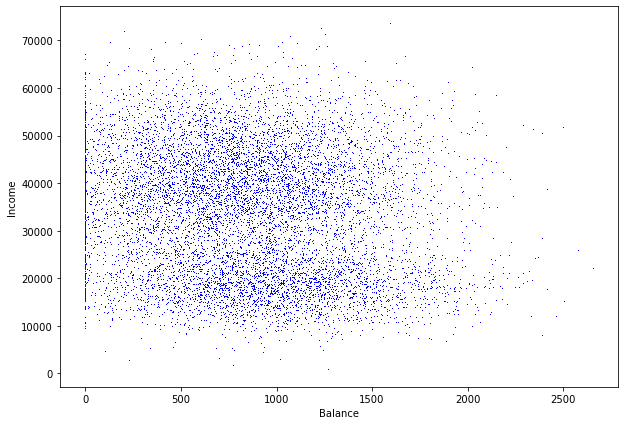

In [5]:
# Plot balance vs. income plot
fig = plt.figure(num=1, figsize=(10, 7))
ax1 = fig.add_subplot()

plt.plot(default_df.balance, default_df.income, 'b,')
plt.xlabel('Balance')
plt.ylabel('Income')

fig.savefig('balance_v_income.png', dpi=100)
plt.show()

In [6]:
default_probs = []

for i in range(len(default_df.default)):
    if default_df.default[i] == 'Yes':
        default_probs.append(1.0)
    else:
        default_probs.append(0.0)

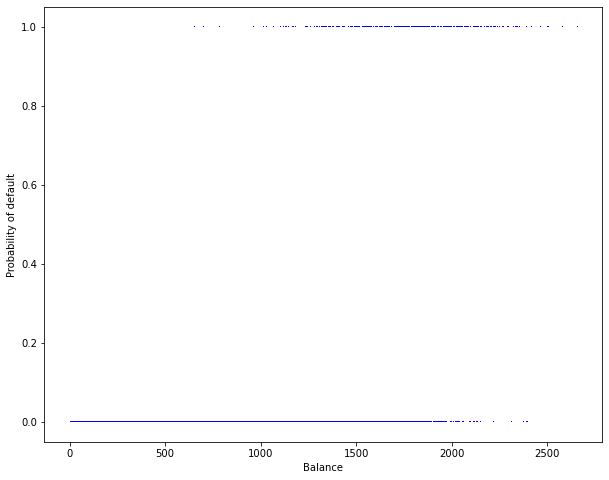

In [7]:
# Plot balance vs. default without decision lines
fig = plt.figure(num=2, figsize=(10, 8))
ax1 = fig.add_subplot()

plt.plot(default_df.balance, default_probs, 'b,')
plt.xlabel('Balance')
plt.ylabel('Probability of default')

plt.show()

In [8]:
default_probs = (np.array(default_probs)).reshape(-1,1)
balances = (default_df.balance.to_numpy()).reshape(-1,1)

In [9]:
# Use linear regression to try to fit data
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(balances, default_probs)

LinearRegression()

In [10]:
n = 3000
x_test = np.linspace(start=0, stop=n, num=n, dtype=int)

In [11]:
# Sample predictions to display regression line
beta0 = model1.intercept_
beta1 = model1.coef_
linear_yhat = (beta1*x_test + beta0).ravel()

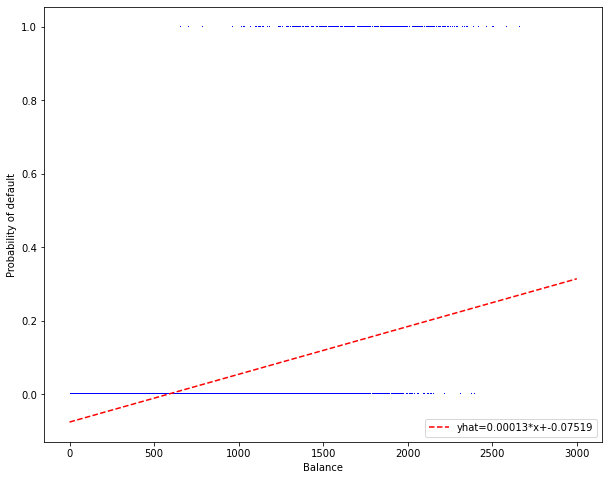

In [12]:
fig = plt.figure(num=2, figsize=(10, 8))
ax1 = fig.add_subplot()

plt.plot(default_df.balance, default_probs, 'b,')
plt.plot(linear_yhat, 'r--', label='yhat={:.5f}*x+{:.5f}'.format(beta1[0,0], beta0[0]))
plt.legend(loc='best')
plt.xlabel('Balance')
plt.ylabel('Probability of default')

fig.savefig('linear_regression_model.png', dpi=100)

plt.show()

In [13]:
# Now use logistic regression
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

model2 = LogisticRegression()
model2.fit(balances, default_probs.ravel())

LogisticRegression()

In [14]:
# Sample predictions to display logistic regression curve
beta0 = model2.intercept_
beta1 = model2.coef_
fitted_curve = expit(beta1*x_test + beta0).ravel()

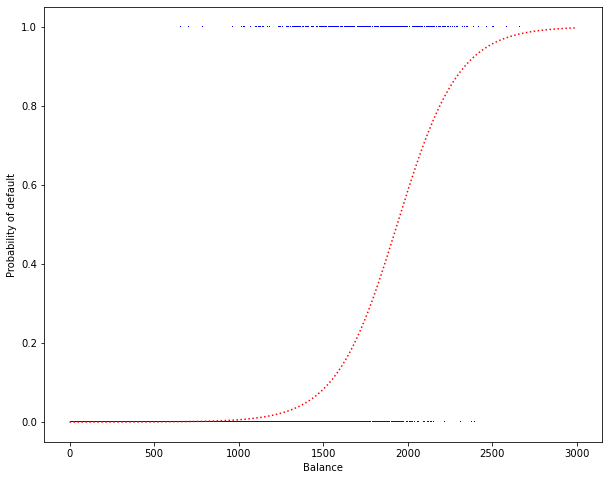

In [15]:
fig = plt.figure(num=2, figsize=(10, 8))
ax1 = fig.add_subplot()

plt.plot(default_df.balance, default_probs, 'b,')
plt.plot(fitted_curve, 'r:')
plt.plot
plt.xlabel('Balance')
plt.ylabel('Probability of default')

fig.savefig('logistic_regression_model.png', dpi=100)

plt.show()